# Importing libraries and load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygame
from keras.datasets import mnist
from keras.utils import np_utils


(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Understanding data

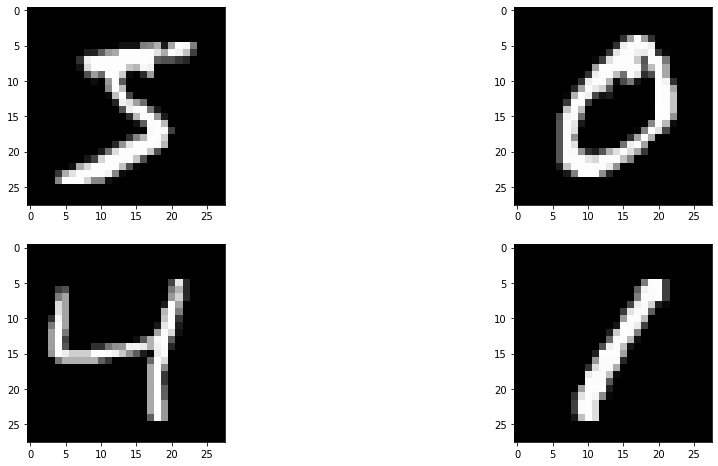

In [2]:
plt.figure(figsize=(16,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [3]:
print(x_train[0][0][0])
print(x_train[0][7][15])

0
253


Images are represented in one channel

From 0(black) to 255(white)

Background has value 0, and everything that has been written has value greater than 0

In [4]:
y_train[0]

5

I need a matrix with zeros and one on 5th index for y

# Preparing data

In [5]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]**2))
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]**2)

In [6]:
x_train.shape

(60000, 784)

In [7]:
x_train = x_train/255.
x_test = x_test/255.

In [8]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Making model 

First, I'd like to try guessing the number

In [9]:
from sklearn.metrics import accuracy_score

def guess(x, y):
    rand = []  
    for i in range(x.shape[0]):
        rand.append(np.random.randint(0,10))
    
    y = [np.argmax(i) for i in y]
    acc = accuracy_score(y, rand) * 100
    
    return acc

guess(x_train, y_train)

10.071666666666665

Guessing have around 10% accuracy, like everyone can expect

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [11]:
acc = accuracy_score(y_test, pred) * 100
acc

88.77000000000001

It's significant better than guessing

# Random Forest 

Let's check what number of n_estimators is best

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [20, 50, 100]}

forest = RandomForestClassifier()

gridsearch = GridSearchCV(estimator=forest, param_grid=parameters, cv=3)

best_model = gridsearch.fit(x_train, y_train)
best_model

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [13]:
best_model.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = accuracy_score(y_test, pred) * 100
acc

96.92

# Neural network

I need to change y's (outputs)

In [16]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [17]:
from keras import models
from keras import layers

def create_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation="relu", input_shape=(784,)))
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = create_model()

I need validation data also for better view of results

In [18]:
import math

x_val = x_train[math.ceil(x_train.shape[0] * .7) :]
y_val = y_train[math.ceil(y_train.shape[0] * .7) :]
x_train = x_train[: math.ceil(x_train.shape[0] * .7)]
y_train = y_train[: math.ceil(y_train.shape[0] * .7)]

In [19]:
history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=128, validation_data=(x_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 44us/step - loss: 0.3163 - accuracy: 0.9100 - val_loss: 0.1641 - val_accuracy: 0.9527
Epoch 2/10
42000/42000 [==============================] - 2s 39us/step - loss: 0.1237 - accuracy: 0.9641 - val_loss: 0.1262 - val_accuracy: 0.9626
Epoch 3/10
42000/42000 [==============================] - 2s 39us/step - loss: 0.0815 - accuracy: 0.9747 - val_loss: 0.1106 - val_accuracy: 0.9668
Epoch 4/10
42000/42000 [==============================] - 2s 44us/step - loss: 0.0582 - accuracy: 0.9822 - val_loss: 0.1074 - val_accuracy: 0.9691
Epoch 5/10
42000/42000 [==============================] - 2s 43us/step - loss: 0.0418 - accuracy: 0.9871 - val_loss: 0.1020 - val_accuracy: 0.9706
Epoch 6/10
42000/42000 [==============================] - 2s 39us/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.1046 - val_accuracy: 0.9706
Epoch 7/10
42000/42000 [==============================] - 2s 39us/st

In [20]:
pred = model.predict(x_test)
pred_max = [np.argmax(i) for i in pred]
y_test_max = [np.argmax(i) for i in y_test]
acc = accuracy_score(y_test_max, pred_max) * 100
acc

97.6

Visualize training history

In [21]:
training_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(training_loss)+1)

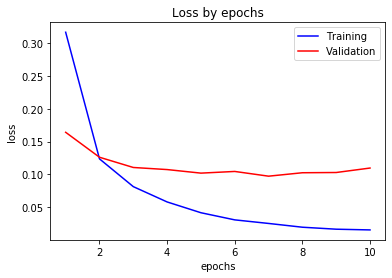

In [22]:
plt.plot(epochs, training_loss, "b")
plt.plot(epochs, val_loss, "r")
plt.title("Loss by epochs")
plt.legend(["Training", "Validation"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [23]:
training_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

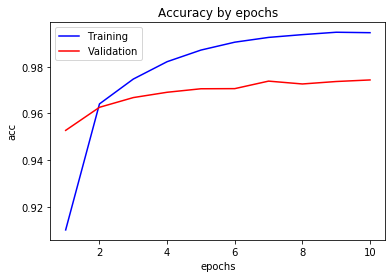

In [24]:
plt.plot(epochs, training_acc, "b")
plt.plot(epochs, val_acc, "r")
plt.title("Accuracy by epochs")
plt.legend(["Training", "Validation"])
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

I can see here an overfitting. After 8th epoch loss started to grow.

I will try kernel regularizers to deal with overfitting

In [26]:
from keras import regularizers

def create_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(784,)))
    model.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = create_model()
history = model.fit(x_train, y_train, epochs=20, verbose=1, batch_size=128, validation_data=(x_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 49us/step - loss: 1.5363 - accuracy: 0.8794 - val_loss: 0.6468 - val_accuracy: 0.9160
Epoch 2/20
42000/42000 [==============================] - 2s 46us/step - loss: 0.5880 - accuracy: 0.9178 - val_loss: 0.5275 - val_accuracy: 0.9305
Epoch 3/20
42000/42000 [==============================] - 2s 42us/step - loss: 0.5136 - accuracy: 0.9281 - val_loss: 0.4833 - val_accuracy: 0.9323
Epoch 4/20
42000/42000 [==============================] - 2s 43us/step - loss: 0.4780 - accuracy: 0.9328 - val_loss: 0.4608 - val_accuracy: 0.9328
Epoch 5/20
42000/42000 [==============================] - 2s 42us/step - loss: 0.4442 - accuracy: 0.9380 - val_loss: 0.4243 - val_accuracy: 0.9434
Epoch 6/20
42000/42000 [==============================] - 2s 42us/step - loss: 0.4233 - accuracy: 0.9420 - val_loss: 0.4072 - val_accuracy: 0.9458
Epoch 7/20
42000/42000 [==============================] - 2s 42us/st

In [27]:
pred = model.predict(x_test)
pred_max = [np.argmax(i) for i in pred]
y_test_max = [np.argmax(i) for i in y_test]
acc = accuracy_score(y_test_max, pred_max) * 100
acc

96.34

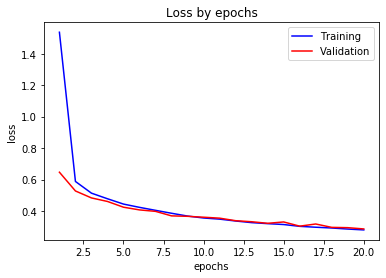

In [28]:
training_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(training_loss)+1)
plt.plot(epochs, training_loss, "b")
plt.plot(epochs, val_loss, "r")
plt.title("Loss by epochs")
plt.legend(["Training", "Validation"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

It helped with overfitting but not so much

So i will try dropout

In [29]:
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(784,)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model = create_model()
history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=128, validation_data=(x_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 67us/step - loss: 1.6459 - accuracy: 0.8494 - val_loss: 0.6615 - val_accuracy: 0.9101
Epoch 2/10
42000/42000 [==============================] - 2s 54us/step - loss: 0.6219 - accuracy: 0.9090 - val_loss: 0.5465 - val_accuracy: 0.9202
Epoch 3/10
42000/42000 [==============================] - 2s 56us/step - loss: 0.5555 - accuracy: 0.9160 - val_loss: 0.5278 - val_accuracy: 0.9187
Epoch 4/10
42000/42000 [==============================] - 2s 55us/step - loss: 0.5214 - accuracy: 0.9210 - val_loss: 0.4774 - val_accuracy: 0.9306
Epoch 5/10
42000/42000 [==============================] - 2s 51us/step - loss: 0.5028 - accuracy: 0.9237 - val_loss: 0.4600 - val_accuracy: 0.9364
Epoch 6/10
42000/42000 [==============================] - 2s 51us/step - loss: 0.4770 - accuracy: 0.9298 - val_loss: 0.4244 - val_accuracy: 0.9449
Epoch 7/10
42000/42000 [==============================] - 2s 51us/st

In [30]:
pred = model.predict(x_test)
pred_max = [np.argmax(i) for i in pred]
y_test_max = [np.argmax(i) for i in y_test]
acc = accuracy_score(y_test_max, pred_max) * 100
acc

94.28

First model was the best one (the simplest one)

Maybe this task isn't so complicated and doesn't need unnecessary complications

# Convolution neural network

First i need to reshape my data

In [31]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [32]:
from keras import optimizers

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_uniform'))
    model.add(layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_uniform'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    
    sgd = optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
    return model

In [33]:
model = create_model()

history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=128, validation_data=(x_val, y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 35s 837us/step - loss: 0.2598 - accuracy: 0.9194 - val_loss: 0.0926 - val_accuracy: 0.9708
Epoch 2/10
42000/42000 [==============================] - 35s 832us/step - loss: 0.0716 - accuracy: 0.9788 - val_loss: 0.0633 - val_accuracy: 0.9799
Epoch 3/10
42000/42000 [==============================] - 33s 790us/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.0612 - val_accuracy: 0.9816
Epoch 4/10
42000/42000 [==============================] - 35s 835us/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.0795 - val_accuracy: 0.9758
Epoch 5/10
42000/42000 [==============================] - 34s 799us/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0631 - val_accuracy: 0.9818
Epoch 6/10
42000/42000 [==============================] - 35s 828us/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0521 - val_accuracy: 0.9839
Epoch 7/10
42000/42000 [==============================] 

In [34]:
pred = model.predict(x_test)
pred_max = [np.argmax(i) for i in pred]
y_test_max = [np.argmax(i) for i in y_test]
acc = accuracy_score(y_test_max, pred_max) * 100
acc

98.68

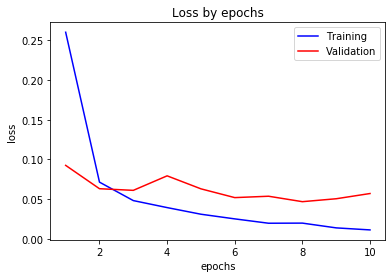

In [35]:
training_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(training_loss)+1)
plt.plot(epochs, training_loss, "b")
plt.plot(epochs, val_loss, "r")
plt.title("Loss by epochs")
plt.legend(["Training", "Validation"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

I reached 98.7% accuracy and i think it's pretty good score 

I was inspired by vgg16 creating this model